<a href="https://colab.research.google.com/github/kevinCSdev/Trabajo_3_Inteligencia_artifical/blob/main/Trabajo_3_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evaluación 2

---

Integrantes : Kevin Cárdenas - Magdiel Fernández - Diego Pardo

**Fecha de Creación:** Junio 2025

**Versión:** 1.0  



---

## Descripción

Este notebook corresponde al desarrollo de la entrega 3 de la asignatura de Inteligencia Artificial de la Universidad del Bío Bío - Sede Concepción

---

## Requisitos de Software

Este notebook fue desarrollado con Python 3.9. A continuación se listan las bibliotecas necesarias:

- numpy (2.0.2)
- matplotlib (3.10.0)
- pandas (2.2.2)
- seaborn (0.13.2)
- sklearn (1.6.1)

Para verificar la versión instalada ejecutar usando el siguiente comando, usando la librería de la cual quieres saber la versión:

```bash
import pandas as pd
print(pd.__version__)
````

In [268]:
!wget https://raw.githubusercontent.com/JaznaLaProfe/InteligenciaArtificial/main/data/dataset_churn_2025.csv

--2025-06-13 01:29:45--  https://raw.githubusercontent.com/JaznaLaProfe/InteligenciaArtificial/main/data/dataset_churn_2025.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 402467 (393K) [text/plain]
Saving to: ‘dataset_churn_2025.csv.7’

dataset_churn_2025. 100%[===================>] 393.03K  --.-KB/s    in 0.05s   

2025-06-13 01:29:46 (8.40 MB/s) - ‘dataset_churn_2025.csv.7’ saved [402467/402467]



# Descripción de la data

+ `age` - Edad del cliente (18 a 75 años)
+ `months_active` - Meses de suscripción activa
+ `monthly_spend` - Gasto mensuales en dólares
+ `support_calls` - Número de llamadas al soporte
+ `contract_type` - Tipo de contrato: `mes_a_mes`, `1_ano`, `2_anos`
+ `has_discount` - Tiene descuento activo (1 = sí, 0 = no)
+ `churm` - Variable objetivo: 1 = abandonó, 0 = NO abandonó

In [269]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import *
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_log_error
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, roc_auc_score, mean_squared_error
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, roc_auc_score, mean_squared_error


import warnings
warnings.filterwarnings('ignore')

In [270]:
data = pd.read_csv("dataset_churn_2025.csv")
data.head()

,age,months_active,monthly_spend,support_calls,contract_type,has_discount,churn
0,56,15,181.55,2,mes_a_mes,1,0
1,69,57,182.60,4,1_ano,0,0
2,46,58,109.54,1,1_ano,1,0
3,32,35,125.52,4,mes_a_mes,1,1
4,60,24,199.34,4,mes_a_mes,1,1


In [271]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            15000 non-null  int64  
 1   months_active  15000 non-null  int64  
 2   monthly_spend  15000 non-null  float64
 3   support_calls  15000 non-null  int64  
 4   contract_type  15000 non-null  object 
 5   has_discount   15000 non-null  int64  
 6   churn          15000 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 820.4+ KB


---

✅ Interpretación

---

- La celda anterior indica la inexistencia de valores nulos

In [272]:
data.shape

(15000, 7)

---

✅ Interpretación

----

  -  Existen 15000 observaciones que corresponen a 15000 clientes de los cuales se tienen 14 características o variables

# Fase 4 - Modelamiento

In [273]:
def metrics_by_matrix(matriz : np.ndarray):
    """ Retorna las métricas de clasificación desde la matriz de confusión """
    tn, fp, fn, tp = matriz.ravel()
    accuracy_manual = (tn+tp)/(tn+fp+fn+tp)
    precision_manual = tp/(tp+fp)
    recall_manual = tp/(tp+fn)
    f1_score_manual = 2*(precision_manual*recall_manual/(precision_manual + recall_manual))
    return accuracy_manual, precision_manual, recall_manual, f1_score_manual

def get_auc(real, prediccion):
    """ Retorna AUC, TPR y FPR """
    fpr, tpr, thresholds = roc_curve(real, prediccion)
    return auc(fpr, tpr), tpr, fpr, thresholds

def false_positive_rate(cm):
    """Recibe una matriz de confusión y retorna la métrica de False Positive Rate"""
    tn, fp, fn, tp = cm.ravel()
    return fp / (fp + tn)

def interpretaciones(recall_value : float, precision_value : float, accuracy_value : float, positive_text : str):
  """
  Se ofrecen interpretaciones menos genéricas y más orientadas al negocio de las métricas, se omite f1-score porque es una combinación de precision y recall
  """
  recall_interpretacion = f"Se han identificado el {recall_value*100:.2f}% de {positive_text}"
  precision_interpretacion = f"Se han identificado un {precision_value*100:.2f}% de empleados {positive_text} y que realmente abandonaron"
  accuracy_interpretacion = f"El modelo acierta con un {accuracy_value*100:.2f}% de acertividad la menor o mayor probabilidad de abandonar"
  return recall_interpretacion, precision_interpretacion, accuracy_interpretacion

def view_rango(df_rangos : pd.DataFrame, value_roc_auc : int):
    """ Retorna la clasificación del rendimiento según el valor de roc_auc """
    return df_rangos[(df_rangos['Inferior'] <= value_roc_auc) & (value_roc_auc <= df_rangos['Superior'])].index[0]


## Modelo de clasificación

### Distribución de variable objetivo. (1 punto)

In [274]:
data.groupby("churn").size()

,0
churn,
0,9988
1,5012


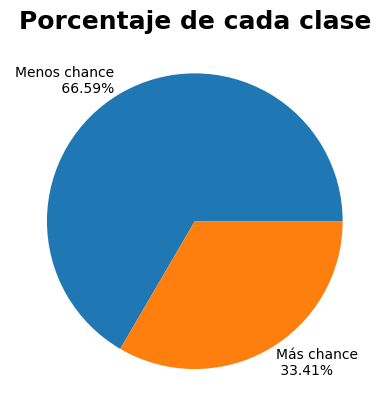

In [275]:
# Gráfico de torta del porcentaje de cada clase
clases = np.array([data[data.churn == 0.0].shape[0],
                   data[data.churn == 1.0].shape[0]]
                  )

# Creando las leyendas del gráfico.
labels = [ str(round(x * 1.0 / clases.sum() * 100.0, 2)) + '%'  for x in clases ]
labels[0] = 'Menos chance\n ' + labels[0]
labels[1] = 'Más chance\n ' + labels[1]

plt.pie(clases, labels=labels)
plt.title('Porcentaje de cada clase', fontsize=18, fontweight="bold")
plt.show()

---

✅ Interpretación

---

 - Se puede apreciar como la distribucion no es simétrica,Esto implica que, al seleccionar una observación al azar hay mayor probabilidad de que esta pertenezca a la clase "Menos chance"

### Selección de variables independientes (1 punto)

In [276]:

# Respalda el data frame limpio original para poder experimentar con las técnicas de transformación
original_dt_final = data.copy()

# Recupera la versión original de los datos
df_final = original_dt_final
# Obtiene las columnas a codificar
categorical_features = df_final.describe(include = np.object_).columns

# Uso de OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
encoded_data = encoder.fit_transform(df_final[categorical_features])

# Convierte a DataFrame para ver el resultado
df_encoded = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out())

# Unir con el DataFrame original (sin la columna original)
df_final = pd.concat([original_dt_final.drop('contract_type', axis=1), df_encoded], axis=1)

df_final.head()

,age,months_active,monthly_spend,support_calls,has_discount,churn,contract_type_1_ano,contract_type_2_anos,contract_type_mes_a_mes
0,56,15,181.55,2,1,0,0.0,0.0,1.0
1,69,57,182.60,4,0,0,1.0,0.0,0.0
2,46,58,109.54,1,1,0,1.0,0.0,0.0
3,32,35,125.52,4,1,1,0.0,0.0,1.0
4,60,24,199.34,4,1,1,0.0,0.0,1.0


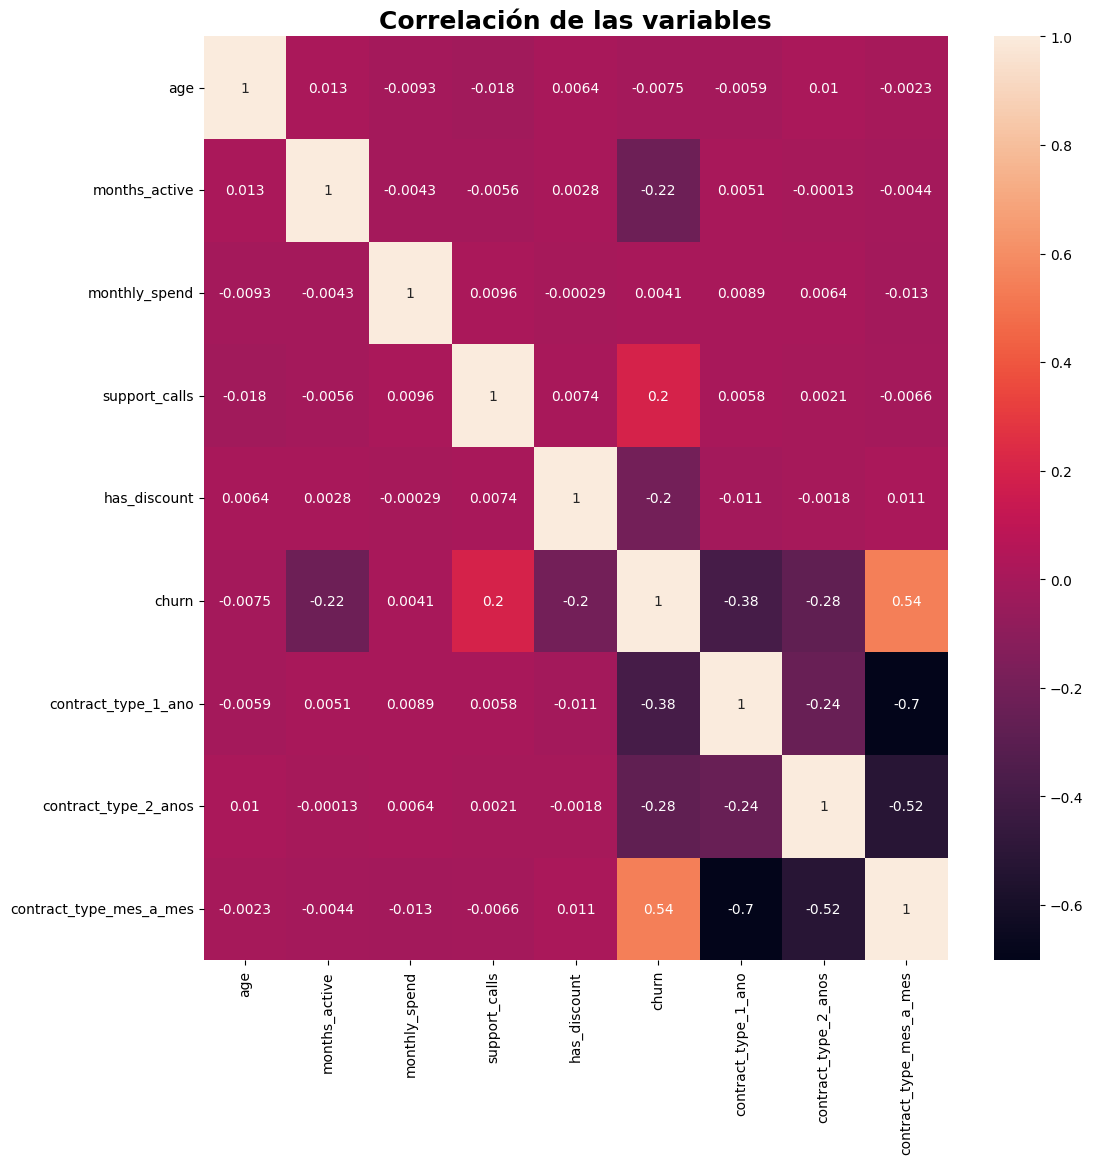

In [277]:
plt.figure(figsize=(12,12))
sns.heatmap(df_final.corr(), annot=True)
plt.title("Correlación de las variables", fontsize=18, fontweight="bold")
plt.show()

In [278]:
corr_matrix = df_final[df_final.describe().columns].corr()
corr_matrix["churn"].sort_values(ascending=False)

,churn
churn,1.000000
contract_type_mes_a_mes,0.543259
support_calls,0.200268
monthly_spend,0.004057
age,-0.007458
has_discount,-0.199226
months_active,-0.223644
contract_type_2_anos,-0.279939
contract_type_1_ano,-0.383210


---

✅ Interpretación

---

- En primer lugar, se encuentra "tipo_contrato_mes_a_mes", cuya correlación es de 0.543259, siendo la variable con mayor influencia en el análisis.

- A continuación, se ubica "tipo_contrato_1_año", con un valor de correlación de 0.383210.

- Le sigue "tipo_contrato_2_años", con una correlación de 0.279939.

- Posteriormente, se encuentra "meses_activo", con un valor de correlación de 0.223644.

- Después, se encuentra "llamadas_soporte", con un valor de correlación de 0.200268.

- Finalmente, aparece "has_discount", con una correlación de 0.199226.

- En conclusion, se ocuparan las 6 variables anteriormnete descrita debidio a que presentan la mayor correlacion respecto a la variable objetivo (churn)

In [279]:
print("Mayor correlacion positiva : ",
    corr_matrix.query("churn < 1 and churn >= 0.1").index.values)

print("Mayor correlacion negativa : ",
    corr_matrix.query("churn <= -0.1").index.values)

# Arma la lista con los nombres de las variables
lst_features = np.append(corr_matrix.query("churn < 1 and churn >= 0.1").index.values,
    corr_matrix.query("churn <= -0.1").index.values)

Mayor correlacion positiva :  ['support_calls' 'contract_type_mes_a_mes']
Mayor correlacion negativa :  ['months_active' 'has_discount' 'contract_type_1_ano'
 'contract_type_2_anos']


In [280]:
data_final = df_final[['churn','support_calls', 'contract_type_mes_a_mes', 'months_active', 'has_discount', 'contract_type_1_ano', 'contract_type_2_anos']]
data_final.head()

,churn,support_calls,contract_type_mes_a_mes,months_active,has_discount,contract_type_1_ano,contract_type_2_anos
0,0,2,1.0,15,1,0.0,0.0
1,0,4,0.0,57,0,1.0,0.0
2,0,1,0.0,58,1,1.0,0.0
3,1,4,1.0,35,1,0.0,0.0
4,1,4,1.0,24,1,0.0,0.0


### Separación datos entrenamiento y test (1 punto)

In [281]:
# Separar las variables predictoras (X) y la variable objetivo (y)
X = data_final.drop(columns=["churn"])
y = data_final["churn"]

# Separar 75% entrenamiento y 25% prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

### Creacion de vista para matriz de confusion

In [282]:
def view_matrix(matriz : np.array, clases : np.array):
    """ Matriz de confusión de forma gráfica """
    plt.figure(figsize=(5,5),facecolor= 'silver')
    group_counts = ["{0:0.0f}".format(value) for value in matriz.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in matriz.flatten()/matriz.sum()]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(matriz, annot=labels, fmt='', cmap='Blues', xticklabels=clases, yticklabels=clases)
    plt.title("Matriz de confusión", fontsize=22, fontweight="bold")
    plt.xlabel("Predicción", fontsize=20)
    plt.ylabel("Real", fontsize=20)
    plt.show()

### Algoritmo 1 - DecisionTreeClassifier

#### Creación del modelo (1 punto)

In [283]:
clf = DecisionTreeClassifier(random_state=42)

#### Entrenamiento del modelo (1 punto)

In [284]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

#### Evaluación del modelo - (1 punto)

In [285]:
y_pred = clf.predict(X_test)

##### Matriz de confusión - (2 puntos)

0.5 puntos por cálculo + 1.5 puntos por interpretación correcta

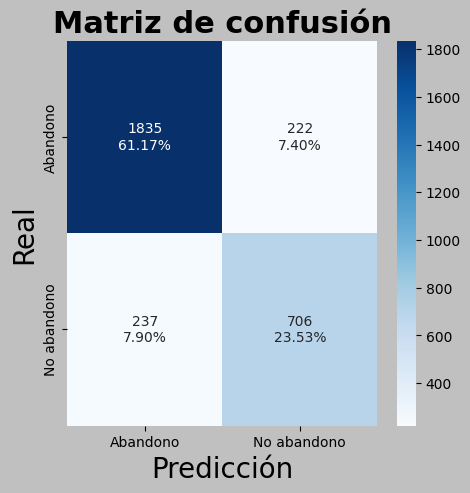

In [286]:
y_pred = clf.predict(X_test)
variables = ['Abandono', 'No abandono']
matriz_clf = confusion_matrix(y_test, y_pred)
# Muestra la matriz de confusión de manera gráfica
view_matrix(matriz_clf, variables)

---

✅ Interpretación

---

- El modelo predijo que 1835 Clientes iban a abandonar lo cual es correcto, esto equivale al 61.17%
- El modelo predijo que 237 Clientes iban a abandonar sin emnbargo lo correcto es que no abandonaron.
- El modelo predijo que 222 Clientes no iban a abandonar sin embargo lo correcto es que abandonaron
- El modelo predijo que 706 Clientes no iban a abandonar lo cual es correcto, esto equivale al 23.53%

**Diagonal Principal**

En total, el modelo predijo correctamente en el 84,7% de los casos, con una cantidad de aciertos de 2541 sobre 3000.

**Diagonal Secundaria**

En total, el modelo predijo correctamente en el 15,3% de los casos, con una cantidad de fallos de 459 sobre 3000.

#### Cálculo e interpretación de métricas

In [287]:
# Define rangos para catalogar el valor de ROC_AUC
valores = [[0.5, 0.59], [0.6, 0.74]
,[0.75, 0.89], [0.9, 0.97]]
rangos = pd.DataFrame(np.array(valores).reshape(4,-1),
            index = ['Malo', 'Regular', 'Bueno', 'Muy bueno'], columns = ['Inferior', 'Superior'])
print(rangos)

# Obtiene el valor del área bajo la curva
roc_auc_base_clf = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
print("ROC_AUC score : {:f}".format(roc_auc_base_clf))

           Inferior  Superior
Malo           0.50      0.59
Regular        0.60      0.74
Bueno          0.75      0.89
Muy bueno      0.90      0.97
ROC_AUC score : 0.947192


In [288]:
print("El modelo a traves del ROC AUC muestra un rendimiento", view_rango(rangos,roc_auc_base_clf))

El modelo a traves del ROC AUC muestra un rendimiento Muy bueno


##### Accuracy (2 puntos)

0.5 puntos por cálculo + 1.5 puntos por interpretación correcta

In [289]:
accuracy_manual_a, precision_manual_a, recall_manual_a, f1_score_manual_a = metrics_by_matrix(matriz_clf)
print("{0:<15} = {1:.4f}".format("Recall", recall_manual_a))
print("{0:<15} = {1:.4f}".format("Precision",precision_manual_a))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("{0:<15} = {1:.4f}".format("F1-score ", f1_score_manual_a))

Recall          = 0.7487
Precision       = 0.7608
Accuracy: 0.847
F1-score        = 0.7547


In [290]:
b_interpretacion, c_interpretacion, d_interpretacion = interpretaciones(recall_manual_a, precision_manual_a, accuracy_manual_a,"con mayor riesgo de abandono")
print("\n", b_interpretacion, "\n", c_interpretacion, "\n", d_interpretacion)


 Se han identificado el 74.87% de con mayor riesgo de abandono 
 Se han identificado un 76.08% de empleados con mayor riesgo de abandono y que realmente abandonaron 
 El modelo acierta con un 84.70% de acertividad la menor o mayor probabilidad de abandonar


In [291]:
# Guardando los resultados
history = {"DecisionTreeClassifier" : [clf, clf.score(X_test, y_test), roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])]}

### Algoritmo 2 - Naive Bayes

#### Creación del modelo - (1 punto)

In [292]:
model = GaussianNB()

#### Entrenamiento del modelo - (1 punto)

In [293]:
model.fit(X_train, y_train)

GaussianNB()

#### Evaluación del modelo - (1 punto)

In [294]:
y_pred = model.predict(X_test)

#### Cálculo e interpretación de métricas

##### Matriz de confusión - (2 puntos)

0.5 puntos por cálculo + 1.5 puntos por interpretación correcta

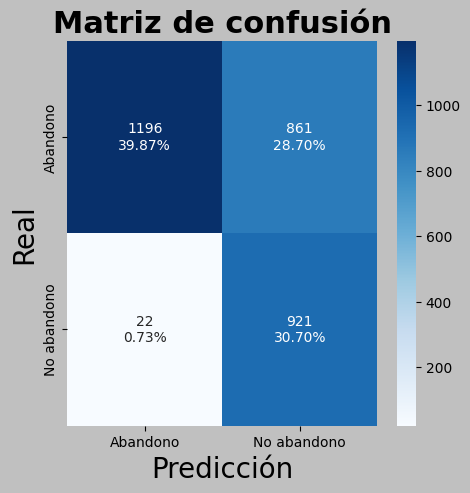

In [295]:
variables = ['Abandono', 'No abandono']
matriz_model = confusion_matrix(y_test, y_pred)
# Muestra la matriz de confusión de manera gráfica
view_matrix(matriz_model, variables)

---

✅ Interpretación

---

- El modelo predijo que 1196 Clientes iban a abandonar lo cual es correcto, esto equivale al 39.87%
- El modelo predijo que 22 Clientes iban a abandonar sin emnbargo lo correcto es que no abandonaron.
- El modelo predijo que 861 Clientes no iban a abandonar sin embargo lo correcto es que abandonaron
- El modelo predijo que 921 Clientes no iban a abandonar lo cual es correcto, esto equivale al 30.70%

**Diagonal Principal**

En total, el modelo predijo correctamente en el 69.57% de los casos, con una cantidad de aciertos de 2117 sobre 3000.

**Diagonal Secundaria**

En total, el modelo predijo correctamente en el 29,43% de los casos, con una cantidad de fallos de 883 sobre 3000.

In [296]:
# Define rangos para catalogar el valor de ROC_AUC
valores = [[0.5, 0.59], [0.6, 0.74]
,[0.75, 0.89], [0.9, 0.97]]
rangos = pd.DataFrame(np.array(valores).reshape(4,-1),
            index = ['Malo', 'Regular', 'Bueno', 'Muy bueno'], columns = ['Inferior', 'Superior'])
print(rangos)

# Obtiene el valor del área bajo la curva
roc_auc_base_model = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print("ROC_AUC score LogisticRegression : {:f}".format(roc_auc_base_model))

           Inferior  Superior
Malo           0.50      0.59
Regular        0.60      0.74
Bueno          0.75      0.89
Muy bueno      0.90      0.97
ROC_AUC score LogisticRegression : 0.907638


In [297]:
print("El modelo a traves del ROC AUC muestra un rendimiento", view_rango(rangos,roc_auc_base_model))

El modelo a traves del ROC AUC muestra un rendimiento Muy bueno


##### Accuracy - (2 puntos)

0.5 puntos por cálculo + 1.5 puntos por interpretación correcta

In [298]:
accuracy_manual_a, precision_manual_a, recall_manual_a, f1_score_manual_a = metrics_by_matrix(matriz_model)
print("{0:<15} = {1:.4f}".format("Recall", recall_manual_a))
print("{0:<15} = {1:.4f}".format("Precision",precision_manual_a))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("{0:<15} = {1:.4f}".format("F1-score ", f1_score_manual_a))

Recall          = 0.9767
Precision       = 0.5168
Accuracy: 0.7056666666666667
F1-score        = 0.6760


In [299]:
b_interpretacion, c_interpretacion, d_interpretacion = interpretaciones(recall_manual_a, precision_manual_a, accuracy_manual_a,"con mayor riesgo de abandono")
print("\n", b_interpretacion, "\n", c_interpretacion, "\n", d_interpretacion)


 Se han identificado el 97.67% de con mayor riesgo de abandono 
 Se han identificado un 51.68% de empleados con mayor riesgo de abandono y que realmente abandonaron 
 El modelo acierta con un 70.57% de acertividad la menor o mayor probabilidad de abandonar


In [300]:
# Guardando los resultados
history["Naive Bayes"] = [model, model.score(X_test, y_test), roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])]

### Algoritmo 3 - Regresión Logística

#### Creación del modelo - (1 punto)

In [301]:
lgr = LogisticRegression( solver='lbfgs')

#### Entrenamiento del modelo - (1 punto)

In [302]:
lgr.fit(X_train, y_train)

LogisticRegression()

#### Evaluación del modelo - (1 punto)

In [303]:
y_pred = lgr.predict(X_test)

#### Cálculo e interpretación de métricas

##### Matriz de confusión - (2 puntos)

0.5 puntos por cálculo + 1.5 puntos por interpretación correcta

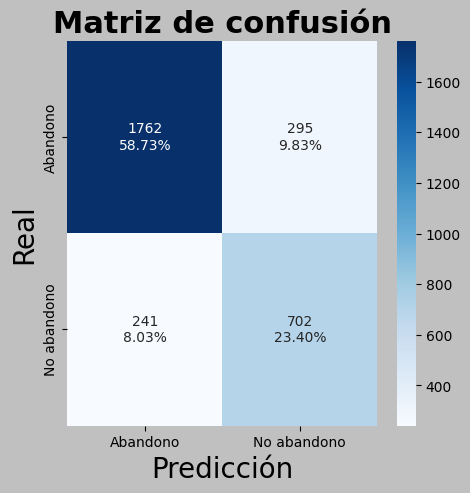

In [304]:
variables = ['Abandono', 'No abandono']
matriz_lgr = confusion_matrix(y_test, y_pred)
# Muestra la matriz de confusión de manera gráfica
view_matrix(matriz_lgr, variables)

---

✅ Interpretación

---

- El modelo predijo que 1762 Clientes iban a abandonar lo cual es correcto, esto equivale al 58.73%
- El modelo predijo que 241 Clientes iban a abandonar sin emnbargo lo correcto es que no abandonaron.
- El modelo predijo que 295 Clientes no iban a abandonar sin embargo lo correcto es que abandonaron
- El modelo predijo que 702 Clientes no iban a abandonar lo cual es correcto, esto equivale al 23.40%

**Diagonal Principal**

En total, el modelo predijo correctamente en el 82.13% de los casos, con una cantidad de aciertos de 2464 sobre 3000.

**Diagonal Secundaria**

En total, el modelo predijo correctamente en el 17.86% de los casos, con una cantidad de fallos de 536 sobre 3000.

In [305]:
# Define rangos para catalogar el valor de ROC_AUC
valores = [[0.5, 0.59], [0.6, 0.74]
,[0.75, 0.89], [0.9, 0.97]]
rangos = pd.DataFrame(np.array(valores).reshape(4,-1),
            index = ['Malo', 'Regular', 'Bueno', 'Muy bueno'], columns = ['Inferior', 'Superior'])
print(rangos)

# Obtiene el valor del área bajo la curva
roc_auc_base_lgr = roc_auc_score(y_test, lgr.predict_proba(X_test)[:, 1])
print("ROC_AUC score LogisticRegression : {:f}".format(roc_auc_base_lgr))

           Inferior  Superior
Malo           0.50      0.59
Regular        0.60      0.74
Bueno          0.75      0.89
Muy bueno      0.90      0.97
ROC_AUC score LogisticRegression : 0.907060


In [306]:
print("El modelo a traves del ROC AUC muestra un rendimiento", view_rango(rangos,roc_auc_base_lgr))

El modelo a traves del ROC AUC muestra un rendimiento Muy bueno


##### Accuracy - (2 puntos)

0.5 puntos por cálculo + 1.5 puntos por interpretación correcta

In [307]:
accuracy_manual_a, precision_manual_a, recall_manual_a, f1_score_manual_a = metrics_by_matrix(matriz_lgr)
print("{0:<15} = {1:.4f}".format("Recall", recall_manual_a))
print("{0:<15} = {1:.4f}".format("Precision",precision_manual_a))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("{0:<15} = {1:.4f}".format("F1-score ", f1_score_manual_a))

Recall          = 0.7444
Precision       = 0.7041
Accuracy: 0.8213333333333334
F1-score        = 0.7237


In [308]:
r_interpretacion, p_interpretacion, a_interpretacion = interpretaciones(recall_manual_a, precision_manual_a, accuracy_manual_a,"con mayor riesgo de abandono")
print("\n", r_interpretacion, "\n", p_interpretacion, "\n", a_interpretacion)


 Se han identificado el 74.44% de con mayor riesgo de abandono 
 Se han identificado un 70.41% de empleados con mayor riesgo de abandono y que realmente abandonaron 
 El modelo acierta con un 82.13% de acertividad la menor o mayor probabilidad de abandonar


In [309]:
# Guardando los resultados
history["Regresión Logística"] = [lgr, lgr.score(X_test, y_test), roc_auc_score(y_test, lgr.predict_proba(X_test)[:, 1])]

### Algoritmo 4 - RandomForest

#### Creación del modelo - (1 punto)

In [310]:
rdf = RandomForestClassifier(n_estimators=50, criterion = "entropy", random_state=29)

#### Entrenamiento del modelo - (1 punto)

In [311]:
rdf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=29)

#### Evaluación del modelo - (1 punto)

In [312]:
y_pred = rdf.predict(X_test)

#### Cálculo e interpretación de métricas

##### Matriz de confusión - (2 puntos)

0.5 puntos por cálculo + 1.5 puntos por interpretación correcta

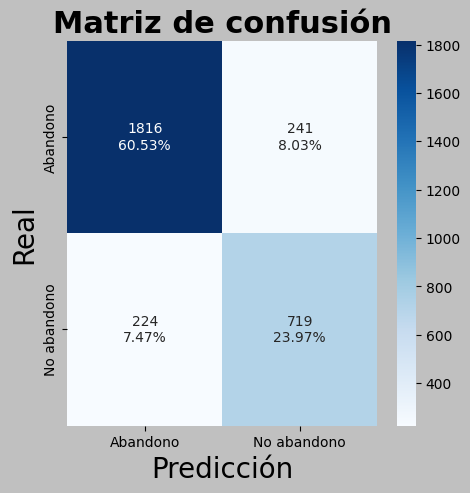

In [313]:
variables = ['Abandono', 'No abandono']
matriz_rdf = confusion_matrix(y_test, y_pred)
# Muestra la matriz de confusión de manera gráfica
view_matrix(matriz_rdf, variables)

---

✅ Interpretación

---

- El modelo predijo que 1816 Clientes iban a abandonar lo cual es correcto, esto equivale al 60.53%
- El modelo predijo que 224 Clientes iban a abandonar sin emnbargo lo correcto es que no abandonaron.
- El modelo predijo que 241 Clientes no iban a abandonar sin embargo lo correcto es que abandonaron
- El modelo predijo que 719 Clientes no iban a abandonar lo cual es correcto, esto equivale al 23.53%

**Diagonal Principal**

En total, el modelo predijo correctamente en el 84,5% de los casos, con una cantidad de aciertos de 2535 sobre 3000.

**Diagonal Secundaria**

En total, el modelo predijo correctamente en el 14,5% de los casos, con una cantidad de fallos de 465 sobre 3000.

In [314]:
# Define rangos para catalogar el valor de ROC_AUC
valores = [[0.5, 0.59], [0.6, 0.74]
,[0.75, 0.89], [0.9, 0.97]]
rangos = pd.DataFrame(np.array(valores).reshape(4,-1),
            index = ['Malo', 'Regular', 'Bueno', 'Muy bueno'], columns = ['Inferior', 'Superior'])
print(rangos)

# Obtiene el valor del área bajo la curva
roc_auc_base_rdf = roc_auc_score(y_test, rdf.predict_proba(X_test)[:, 1])
print("ROC_AUC score LogisticRegression : {:f}".format(roc_auc_base_rdf))

           Inferior  Superior
Malo           0.50      0.59
Regular        0.60      0.74
Bueno          0.75      0.89
Muy bueno      0.90      0.97
ROC_AUC score LogisticRegression : 0.947186


In [315]:
print("El modelo a traves del ROC AUC muestra un rendimiento", view_rango(rangos,roc_auc_base_rdf))

El modelo a traves del ROC AUC muestra un rendimiento Muy bueno


##### Accuracy - (2 puntos)

0.5 puntos por cálculo + 1.5 puntos por interpretación correcta

In [318]:
accuracy_manual_a, precision_manual_a, recall_manual_a, f1_score_manual_a = metrics_by_matrix(matriz_rdf)
print("{0:<15} = {1:.4f}".format("Recall", recall_manual_a))
print("{0:<15} = {1:.4f}".format("Precision",precision_manual_a))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("{0:<15} = {1:.4f}".format("F1-score ", f1_score_manual_a))

Recall          = 0.7625
Precision       = 0.7490
Accuracy: 0.845
F1-score        = 0.7556


In [317]:
r_interpretacion, p_interpretacion, a_interpretacion = interpretaciones(recall_manual_a, precision_manual_a, accuracy_manual_a,"con mayor riesgo de abandono")
print("\n", r_interpretacion, "\n", p_interpretacion, "\n", a_interpretacion)


 Se han identificado el 76.25% de con mayor riesgo de abandono 
 Se han identificado un 74.90% de empleados con mayor riesgo de abandono y que realmente abandonaron 
 El modelo acierta con un 84.50% de acertividad la menor o mayor probabilidad de abandonar


In [ ]:
# Guardando los resultados
history["RandomForest"] = [rdf, rdf.score(X_test, y_test), roc_auc_score(y_test, rdf.predict_proba(X_test)[:, 1])]

---

✅ Interpretación

---

### Comparación de los modelos - (2 puntos)

In [ ]:
# Convertimos el historial a un DataFrame
historial = pd.DataFrame([
    {"Modelo" : key, "Descripción": val[0], "Score": val[1], "ROC_AUC": val[2]}
    for key, val in history.items()
  ])
print(historial)

                   Modelo                                        Descripción  \
0  DecisionTreeClassifier            DecisionTreeClassifier(random_state=42)   
1             Naive Bayes                                       GaussianNB()   
2     Regresión Logística                               LogisticRegression()   
3            RandomForest  (DecisionTreeClassifier(criterion='entropy', m...   

      Score   ROC_AUC  
0  0.847000  0.947192  
1  0.705667  0.907638  
2  0.821333  0.907060  
3  0.845000  0.947186  


---

✅ Interpretación

---

Por lo que podemos ver en la tabla, el modelo con mejor presición, es por poco el "DecisionTreeClassifier" con un puntaje de "0.847000", sin embargo, le sigue el modelo "RandomForest" que tiene un puntaje de "0.845000", es decir que entre ambos modelos en terminos de presición, el "DecisionTreeClassifier" es 0,002 puntos mejor.

Adicionalmente, también podemos ver que tanto el modelo "Naive Bayes" como el "Regrsión Logística" se quedan atrás tanto en presición como en discriminar a los clientes que abandonan o no un servicio.

En el segúndo punto (ROC_AUC), vuelven a obtener un casi empate, pero esta vez la brecha es más corta (Practicamente nula), por lo que significa que tanto el modelo "DecisionTreeClassifier" como el "RandomForest" discriminan practicamente igual de bien entre los clientes que abandonan o no un servicio.